In [33]:
%load_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np
import matplotlib.pyplot as plt
import pickle

LOG.propagate = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
# Get ArtemisBLEController object
ble = get_ble_controller()

# Connect to the Artemis Device
ble.connect()

2023-05-09 10:38:49,010 | INFO     |: Looking for Artemis Nano Peripheral Device: C0:83:b1:6a:38:3C
2023-05-09 10:38:52,464 | INFO     |: Connected to C0:83:b1:6a:38:3C


In [35]:
def get_data_cb(uuid, byte_array):
    global tof_list, pwm_list
    if byte_array is not None:
        s = byte_array.decode("utf-8")
        s = s.split("|")  # split each reading
        
        if s[0] == 'T':
            # TOF
            readings = s[1].split(',')[:-1]
            for data in readings:
                data = data.split('&')
                time = int(data[0])
                tof  = int(data[1])
                if time > 0:
                    tof_time_list.append(time)
                    tof_data_list.append(tof)
        
        elif s[0] == 'P':
            # PWM
            readings = s[1].split(',')[:-1]
            for data in readings:
                data = data.split('&')
                time = int(data[0])
                pwm  = int(data[1])
                if time > 0:
                    pwm_time_list.append(time)
                    pwm_data_list.append(pwm)

### Run 1:
(5, -3)

In [36]:
ble.start_notify(ble.uuid['RX_STRING'], get_data_cb)

In [37]:
tof_data_list = []
pwm_data_list = []
tof_time_list = []
pwm_time_list = []

In [38]:
# start
ble.send_command(CMD.SEND_TWO_INTS, "")

In [39]:
# stop
ble.send_command(CMD.SEND_THREE_FLOATS, "")

In [40]:
ble.stop_notify(ble.uuid['RX_STRING'])

In [41]:
tof_time_list = [x - tof_time_list[0] for x in tof_time_list]
pwm_time_list = [x - pwm_time_list[0] for x in pwm_time_list]

if tof_time_list[-1] > 100:
    tof_time_list = np.array(tof_time_list)/1000
if pwm_time_list[-1] > 100:
    pwm_time_list = np.array(pwm_time_list)/1000

In [42]:
print(tof_data_list)
print(tof_time_list)
print(pwm_data_list)
print(pwm_time_list)

[848, 759, 1337, 1410, 664, 476, 303, 244, 201, 134, 89, 70, 61, 71, 105, 183, 399, 1068, 924, 853]
[0.    0.377 0.755 1.133 1.51  1.892 2.272 2.653 3.03  3.407 3.786 4.167
 4.545 4.923 5.302 5.683 6.062 6.443 6.823 7.199]
[0, 200, 0, 200, 0, 200, 0, 200, 0, 200, 0, 200, 0, 200, 0, 200, 0, 200, 0, 200, 0, 200, 0, 200, 0, 200, 0, 200, 0, 200, 0, 200, 0, 200, 0, 200, 0, 200, 0, 200, 0, 0, 0]
[ 0.     0.     0.153  0.37   0.529  0.748  0.907  1.126  1.286  1.503
  1.663  1.88   2.039  2.262  2.421  2.643  2.802  3.023  3.182  3.4
  3.559  3.777  3.936  4.156  4.315  4.538  4.697  4.916  5.076  5.293
  5.453  5.672  5.831  6.053  6.213  6.432  6.591  6.813  6.973  7.193
  7.352  7.569 10.289]


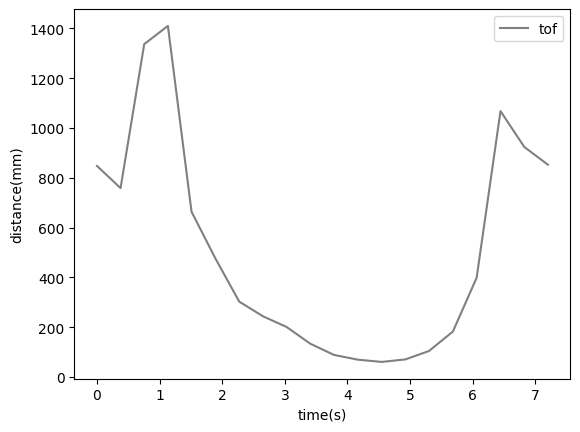

In [43]:
plt.plot(tof_time_list, tof_data_list, color='gray', label='tof')
plt.legend(loc="upper right")
plt.xlabel('time(s)')
plt.ylabel('distance(mm)')
plt.show()

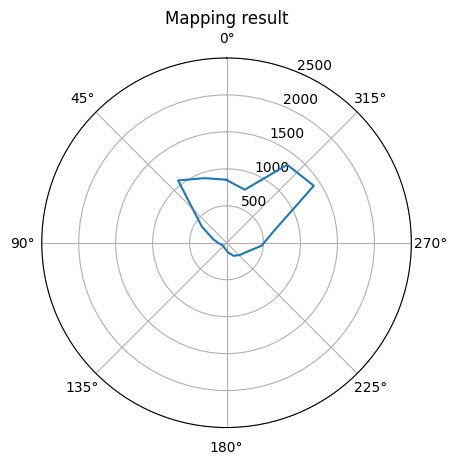

In [44]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
theta = np.linspace(2*np.pi,0,num=len(tof_data_list))
ax.plot(theta, tof_data_list)
ax.grid(True)
ax.set_rticks([500,1000,1500,2000,2500])
ax.set_rlabel_position(-22.5)
ax.set_theta_zero_location("N")

ax.set_title("Mapping result")
plt.show()

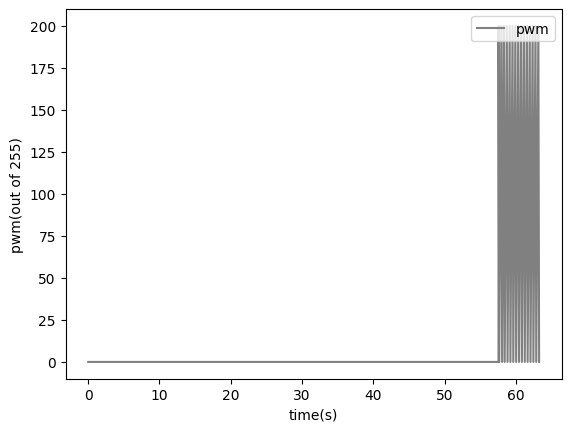

In [13]:
if pwm_data_list[0] != 0:
    pwm_data_list[0] = 0

plt.plot(pwm_time_list, pwm_data_list, color='gray', label='pwm')
plt.legend(loc="upper right")
plt.xlabel('time(s)')
plt.ylabel('pwm(out of 255)')
plt.show()

In [15]:
# record data
with open('./lab9_data/run_1.pkl', 'wb') as pickleFile:
        pickle.dump(tof_data_list, pickleFile)

### Run 2:
(-3, -2)

In [16]:
tof_data_list = []
pwm_data_list = []
tof_time_list = []
pwm_time_list = []

In [17]:
ble.start_notify(ble.uuid['RX_STRING'], get_data_cb)

In [18]:
# start
ble.send_command(CMD.SEND_TWO_INTS, "")

In [19]:
# stop
ble.send_command(CMD.SEND_THREE_FLOATS, "")

In [20]:
ble.stop_notify(ble.uuid['RX_STRING'])

In [21]:
tof_time_list = [x - tof_time_list[0] for x in tof_time_list]
pwm_time_list = [x - pwm_time_list[0] for x in pwm_time_list]

if tof_time_list[-1] > 100:
    tof_time_list = np.array(tof_time_list)/1000
if pwm_time_list[-1] > 100:
    pwm_time_list = np.array(pwm_time_list)/1000

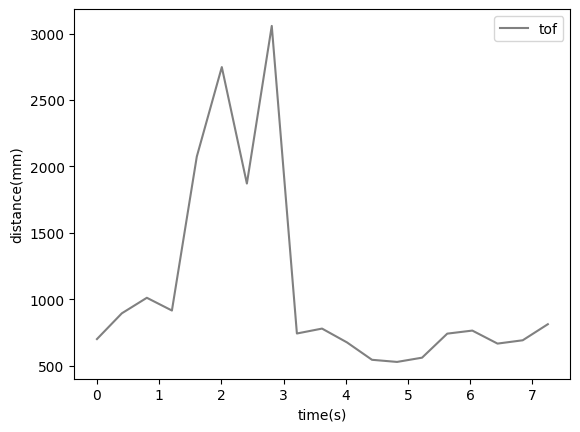

In [22]:
plt.plot(tof_time_list, tof_data_list, color='gray', label='tof')
plt.legend(loc="upper right")
plt.xlabel('time(s)')
plt.ylabel('distance(mm)')
plt.show()

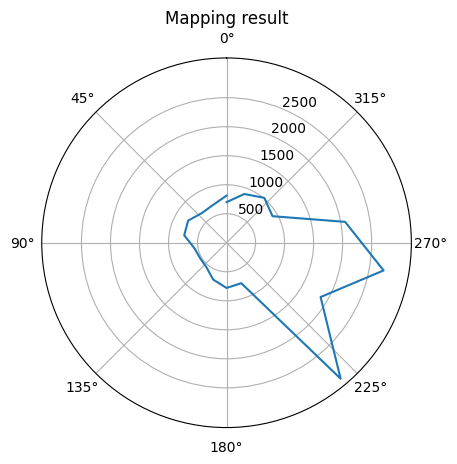

In [23]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
theta = np.linspace(2*np.pi,0,num=len(tof_data_list))
ax.plot(theta, tof_data_list)
ax.grid(True)
ax.set_rticks([500,1000,1500,2000,2500])
ax.set_rlabel_position(-22.5)
ax.set_theta_zero_location("N")

ax.set_title("Mapping result")
plt.show()

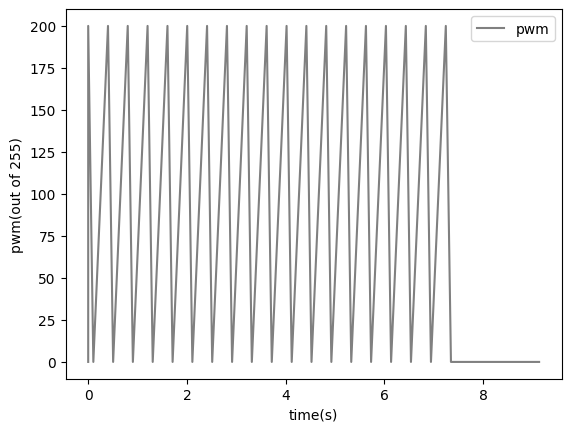

In [24]:
if pwm_data_list[0] != 0:
    pwm_data_list[0] = 0

plt.plot(pwm_time_list, pwm_data_list, color='gray', label='pwm')
plt.legend(loc="upper right")
plt.xlabel('time(s)')
plt.ylabel('pwm(out of 255)')
plt.show()

In [25]:
# record data
with open('./lab9_data/run_2.pkl', 'wb') as pickleFile:
        pickle.dump(tof_data_list, pickleFile)

### Run 3:
(0, 3)

In [26]:
tof_data_list = []
pwm_data_list = []
tof_time_list = []
pwm_time_list = []

In [27]:
ble.start_notify(ble.uuid['RX_STRING'], get_data_cb)

In [28]:
# start
ble.send_command(CMD.SEND_TWO_INTS, "")

In [29]:
# stop
ble.send_command(CMD.SEND_THREE_FLOATS, "")

In [30]:
ble.stop_notify(ble.uuid['RX_STRING'])

In [31]:
tof_time_list = [x - tof_time_list[0] for x in tof_time_list]
pwm_time_list = [x - pwm_time_list[0] for x in pwm_time_list]

if tof_time_list[-1] > 100:
    tof_time_list = np.array(tof_time_list)/1000
if pwm_time_list[-1] > 100:
    pwm_time_list = np.array(pwm_time_list)/1000

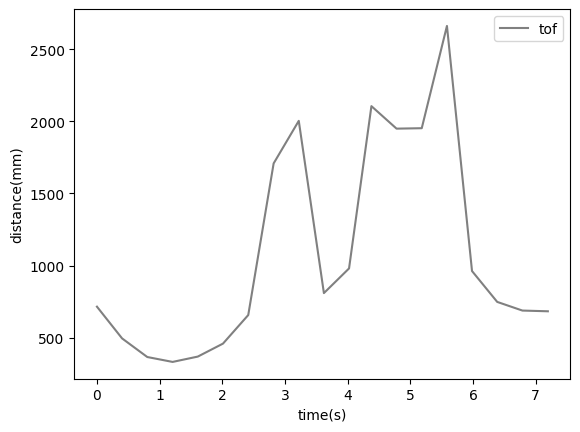

In [32]:
plt.plot(tof_time_list, tof_data_list, color='gray', label='tof')
plt.legend(loc="upper right")
plt.xlabel('time(s)')
plt.ylabel('distance(mm)')
plt.show()

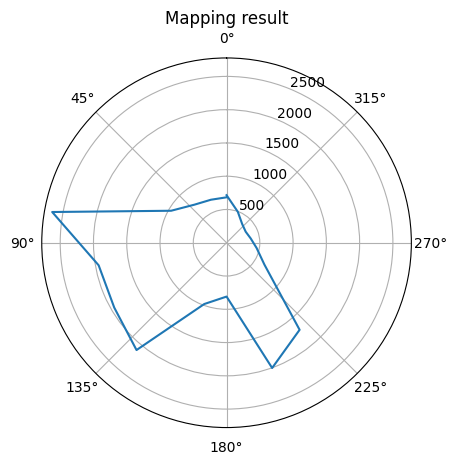

In [33]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
theta = np.linspace(2*np.pi,0,num=len(tof_data_list))
ax.plot(theta, tof_data_list)
ax.grid(True)
ax.set_rticks([500,1000,1500,2000,2500])
ax.set_rlabel_position(-22.5)
ax.set_theta_zero_location("N")

ax.set_title("Mapping result")
plt.show()

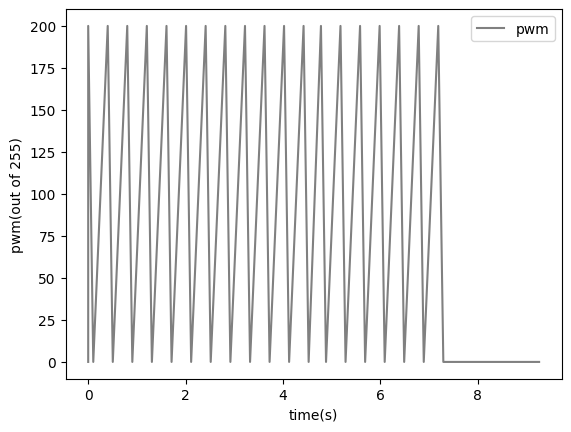

In [36]:
if pwm_data_list[0] != 0:
    pwm_data_list[0] = 0

plt.plot(pwm_time_list, pwm_data_list, color='gray', label='pwm')
plt.legend(loc="upper right")
plt.xlabel('time(s)')
plt.ylabel('pwm(out of 255)')
plt.show()

In [37]:
# record data
with open('./lab9_data/run_3.pkl', 'wb') as pickleFile:
        pickle.dump(tof_data_list, pickleFile)

### Run 4:
(5, 3)

In [38]:
tof_data_list = []
pwm_data_list = []
tof_time_list = []
pwm_time_list = []

In [39]:
ble.start_notify(ble.uuid['RX_STRING'], get_data_cb)

In [40]:
# start
ble.send_command(CMD.SEND_TWO_INTS, "")

In [41]:
# stop
ble.send_command(CMD.SEND_THREE_FLOATS, "")

In [42]:
ble.stop_notify(ble.uuid['RX_STRING'])

In [43]:
tof_time_list = [x - tof_time_list[0] for x in tof_time_list]
pwm_time_list = [x - pwm_time_list[0] for x in pwm_time_list]

if tof_time_list[-1] > 100:
    tof_time_list = np.array(tof_time_list)/1000
if pwm_time_list[-1] > 100:
    pwm_time_list = np.array(pwm_time_list)/1000

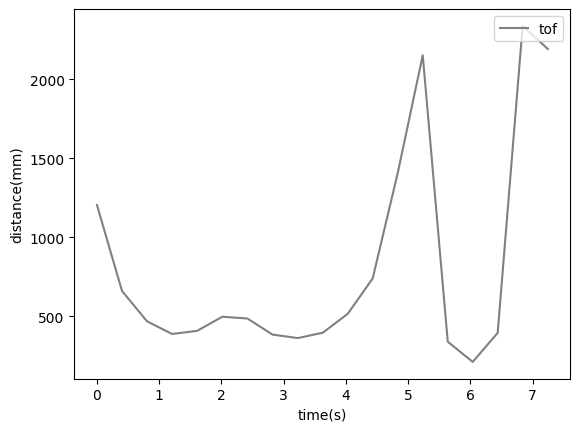

In [44]:
plt.plot(tof_time_list, tof_data_list, color='gray', label='tof')
plt.legend(loc="upper right")
plt.xlabel('time(s)')
plt.ylabel('distance(mm)')
plt.show()

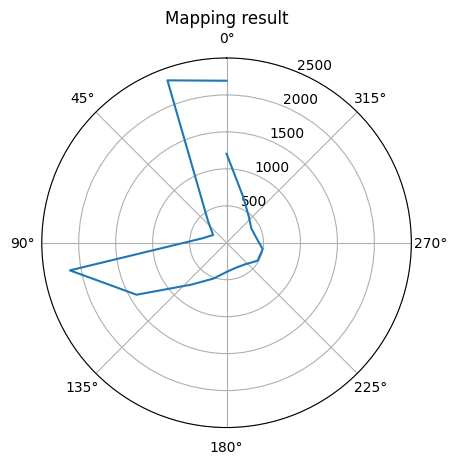

In [45]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
theta = np.linspace(2*np.pi,0,num=len(tof_data_list))
ax.plot(theta, tof_data_list)
ax.grid(True)
ax.set_rticks([500,1000,1500,2000,2500])
ax.set_rlabel_position(-22.5)
ax.set_theta_zero_location("N")

ax.set_title("Mapping result")
plt.show()

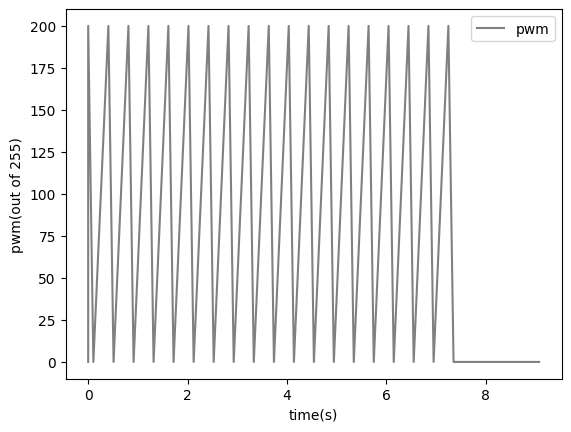

In [46]:
if pwm_data_list[0] != 0:
    pwm_data_list[0] = 0

plt.plot(pwm_time_list, pwm_data_list, color='gray', label='pwm')
plt.legend(loc="upper right")
plt.xlabel('time(s)')
plt.ylabel('pwm(out of 255)')
plt.show()

In [47]:
# record data
with open('./lab9_data/run_4.pkl', 'wb') as pickleFile:
        pickle.dump(tof_data_list, pickleFile)

In [48]:
ble.disconnect()

2023-04-17 17:09:58,458 | INFO     |: Disconnected from C0:83:b1:6a:38:3C
